# 24. New Dataset
With the new data, the webIQ dataset, we can finally see how the actual scores are, since this is the dataset on which we will have to deliver.

## Loading the data

In [5]:
import pandas as pd
import pickle

# filenameModel = "../darkweb/data/pickle/tfidf_model.pkl"
filenameVectors = "../darkweb/data/pickle/tfidf_vectors.pkl"
filenameCategories = "../Data/WebIQ_Mapped.pkl"

features = pickle.load(open(filenameVectors, 'rb'))
labels = pickle.load(open(filenameCategories, 'rb'))

d = { 'Label': labels.Label, 'Features': features }
df = pd.DataFrame(d)

## Visualizing

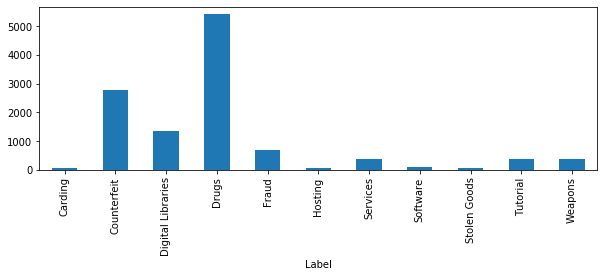

11589

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
df.groupby('Label')['Features'].count().plot.bar(ylim=0)
plt.show()

df.Label.count()

## Splitting

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)

X_train

<7764x359989 sparse matrix of type '<class 'numpy.float64'>'
	with 2063462 stored elements in Compressed Sparse Row format>

## Training multiple models

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


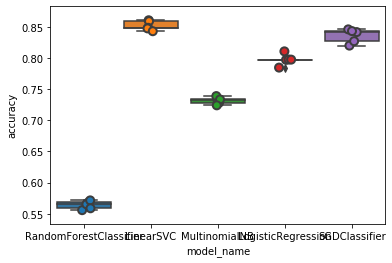

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5, max_iter=1000, tol=1e-3, class_weight='balanced')
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [43]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.851744
LogisticRegression        0.797467
MultinomialNB             0.731549
RandomForestClassifier    0.563982
SGDClassifier             0.835530
Name: accuracy, dtype: float64

## Conclusion
LinearSVC is the best model once again. However, the results are quite a bit worse than on the Agora Dataset.